Author:
CHAN Chung Hang  22061759S
CHEUNG Ho Bun  22056983S
POON Wing Fung 22056100S
YEUNG Ka Wai 22049550S

This Project will use a Python Package call `graphviz`. If you are not using the poetry package file that I provide,

Please visit the Website https://graphviz.org/ to handle with it.

In [2]:
import pandas as pd
# Load the GDP and visitor data
gdp_data = pd.read_csv('Data_GDP.csv')
print(f'Raw GDP Data from csv:\n{gdp_data.head()}')

# Cleaning and transforming GDP data
gdp_years = gdp_data.iloc[1, 2:].astype(str)  # Get the years
gdp_quarters = gdp_data.iloc[2, 2:].astype(str).str.extract(r'(\d)').astype(int)  # Extract the quarters

# Create the cleaned GDP DataFrame
gdp_cleaned = pd.DataFrame({
    'Year':gdp_years.values,
    'Quarter': gdp_quarters[0],  # The extracted quarters
    'GDP_Million_HKD': gdp_data.iloc[4, 2:].values# The GDP values starting from the fifth row
})

# Convert 'Year' and 'Quarter' to integers
gdp_cleaned['Year'] = gdp_cleaned['Year'].astype(int)
gdp_cleaned['Quarter'] = gdp_cleaned['Quarter'].astype(int)

print(f'Cleaned GDP Data:\n{gdp_cleaned.head()}')

Raw GDP Data from csv:
  表310-31001：本地生產總值、本地生產總值內含平減物價指數及按人口平均計算的本地生產總值 Unnamed: 1 Unnamed: 2  \
0                                                        NaN        NaN   
1                                               年        NaN       2002   
2                                               季        NaN          1   
3                                             NaN        NaN        NaN   
4                                本地生產總值 - 以當時市價計算       百萬港元     308313   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       2002       2002       2002       2003       2003       2003   
2          2          3          4          1          2          3   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4     315423     333309     340295     304457     293356     323046   

  Unnamed: 9  ... Unnamed: 80 Unnamed: 81 Unnamed: 82 Unnamed: 83 Unnamed: 84  \
0        NaN  ... 

In [3]:
import pandas as pd
# Prepare visitor data by different countries
new_visitor_data = pd.read_csv("Data_Visitor.csv", skiprows=4)
print(f'Raw Visitors Data From CSV:\n{new_visitor_data.head()}')
new_visitor_data.columns = ['Year', 'Month', 'Africa', 'Americas', 'Australia_NewZealand_SouthPacific', 'Europe',
                            'MiddleEast', 'NorthAsia', 'SouthAsia_SoutheastAsia', 'MainlandChina', 'Taiwan', 'Macau',
                            'Unidentified', 'Total']
# Clean and prepare visitor data
new_visitor_data['Year'] = new_visitor_data['Year'].replace('\xa0', '').str.strip()
new_visitor_data['Month'] = new_visitor_data['Month'].replace('\xa0', '').str.strip()
new_visitor_data = new_visitor_data[(new_visitor_data['Year'].str.isnumeric()) & (new_visitor_data['Month'].str.isnumeric())]
new_visitor_data['Year'] = new_visitor_data['Year'].astype(int)
new_visitor_data['Month'] = new_visitor_data['Month'].astype(int)


Raw Visitors Data From CSV:
  居住國家／地區  Unnamed: 1       非洲        美洲  澳大利亞、新西蘭及南太平洋        歐洲       中東  \
0        年          月      NaN       NaN            NaN       NaN      NaN   
1     2002          1   7338.0  104012.0        35824.0   76764.0   6827.0   
2     2002          2   3942.0   80375.0        22904.0   68740.0   4245.0   
3     2002          3   7163.0  125840.0        36680.0  100225.0   5772.0   
4     2002          4  10372.0  128529.0        37153.0  114290.0  12308.0   

         北亞    南亞及東南亞      中國內地        台灣       澳門 未能辨別         總計  
0       NaN       NaN       NaN       NaN      NaN  NaN        NaN  
1  152990.0  113359.0  454817.0  188710.0  39899.0    -  1180540.0  
2  130761.0   99917.0  471528.0  191475.0  41966.0    -  1115853.0  
3  167914.0  154337.0  465230.0  189600.0  44458.0    -  1297219.0  
4  147653.0  169190.0  525498.0  218416.0  39632.0    -  1403041.0  


In [4]:
import commonFunctions as CF
# Convert month to quarter
new_visitor_data['Quarter'] = new_visitor_data['Month'].apply(CF.get_quarter)

# Group by year and quarter
quarterly_data = new_visitor_data.groupby(['Year', 'Quarter']).sum().reset_index()

# print(quarterly_data)
# print(gdp_cleaned)

# Merge the GDP and visitor data on 'Year' and 'Quarter'
merged_data = pd.merge(gdp_cleaned, quarterly_data, on=['Year', 'Quarter'], how='inner')

# Analysis with before and after 2019
data_before_2019 = merged_data[merged_data['Year'] <= 2019]
data_after_2019 = merged_data[merged_data['Year'] >= 2019]
print(f'All Merged Data By GDP & Visitors:\n{merged_data.head()}')
print(f'2002 - 2019 Merged Data By GDP & Visitors:\n{data_before_2019.head()}')
print(f'2019-2023 Merged Data By GDP & Visitors:\n{data_after_2019.head()}')

All Merged Data By GDP & Visitors:
   Year  Quarter GDP_Million_HKD  Month   Africa  Americas  \
0  2002        1          308313      6  18443.0  310227.0   
1  2002        2          315423     15  24031.0  348224.0   
2  2002        3          333309     24  22988.0  308774.0   
3  2002        4          340295     33  26428.0  379615.0   
4  2003        1          304457      6  23484.0  292648.0   

   Australia_NewZealand_SouthPacific    Europe  MiddleEast  NorthAsia  \
0                            95408.0  245729.0     16844.0   451665.0   
1                           104395.0  267621.0     24060.0   433098.0   
2                            95784.0  242764.0     20277.0   475169.0   
3                           114609.0  327774.0     26156.0   492526.0   
4                            98506.0  254293.0     16606.0   446226.0   

   SouthAsia_SoutheastAsia  MainlandChina    Taiwan     Macau Unidentified  \
0                 367613.0      1391575.0  569785.0  126323.0          --- 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.tree import export_text, export_graphviz
import graphviz

# a function method for plot scatter
def plot_visitor_GDP_results_with_raw_data(merged_data, country, folder, flag):
    plt.figure(figsize=(10, 8))
    plt.scatter(merged_data[country], merged_data['GDP_Million_HKD'], alpha=0.5)
    plt.title(f'{flag} Relationship Between Number of Visitors and GDP for {country}')
    plt.xlabel('Number of Visitors')
    plt.ylabel('GDP (Million HKD)')
    # Format the y-axis ticks with larger interval and with thousand separator
    ax = plt.gca()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    # Rotate the y-axis labels
    plt.setp(ax.get_yticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout
    plt.show()

# define a function for plot linear result
def plot_linear_results(X_test, y_test, y_pred, title, folder):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test, y_test, color='blue', label='Test data')
    plt.plot(X_test, y_pred, color='red', label='Regression Line')
    plt.xlabel(f'Visitor')
    plt.ylabel('Predicted GDP')
    plt.title(title)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# define a function for plot Polynomial result
def plot_poly_results(X_test, y_test, model_poly, degree, title, folder):
    x_grid = np.linspace(X_test.min(), X_test.max(), 300).reshape(-1, 1)
    y_grid_pred = model_poly.predict(x_grid)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.plot(x_grid, y_grid_pred, color='red', label=f'Polynomial Degree {degree} Regression Line')
    plt.title(f"{title}")
    plt.xlabel(f'Visitors')
    plt.ylabel('GDP (Million HKD)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(f"{folder}/{title}.png")
    plt.close()

# define a function to print the result
def print_result(analysis_results):
    for country, result in analysis_results.items():
        lr_r2 = result['Linear Regression']['r2_score']
        lr_pearson_r = result['Linear Regression'].get('pearson_r', None)  # Use .get() to avoid KeyError if not present
        rf_r2 = result['Random Forest']['r2_score']
        r2_poly = result['Polynomial Regression']['r2_score']

        print(f"Analysis for {country}:")
        if lr_r2 is not None:
            print(f"The Linear Regression model's R^2 score is {lr_r2:.2f}. This means that "
                  f"{lr_r2 * 100:.1f}% of the variance in GDP is explained by the number of visitors from {country}.")
        if lr_pearson_r is not None:
            print(f"The Linear Regression model's Pearson correlation coefficient is {lr_pearson_r:.2f} for {country}")
        if r2_poly is not None:
            print(f"The Polynomial Regression model's R^2 score is {r2_poly:.2f}. This means that "
                  f"{r2_poly * 100:.1f}% of the variance in GDP is explained by the number of visitors from {country}.")
        if rf_r2 is not None:
            if rf_r2 > lr_r2:
                accuracy_statement = "indicating a higher level of accuracy in prediction compared to the Linear Regression model."
            else:
                accuracy_statement = "indicating a similar or lower level of accuracy in prediction compared to the Linear Regression model."
            print(f"The Random Forest model's R^2 score is {rf_r2:.2f}. This means that "
                  f"{rf_r2 * 100:.1f}% of the variance in GDP is explained by the number of visitors from {country}, {accuracy_statement}")
        else:
            print("The Random Forest model's R^2 score is not available for this analysis.")
        print()

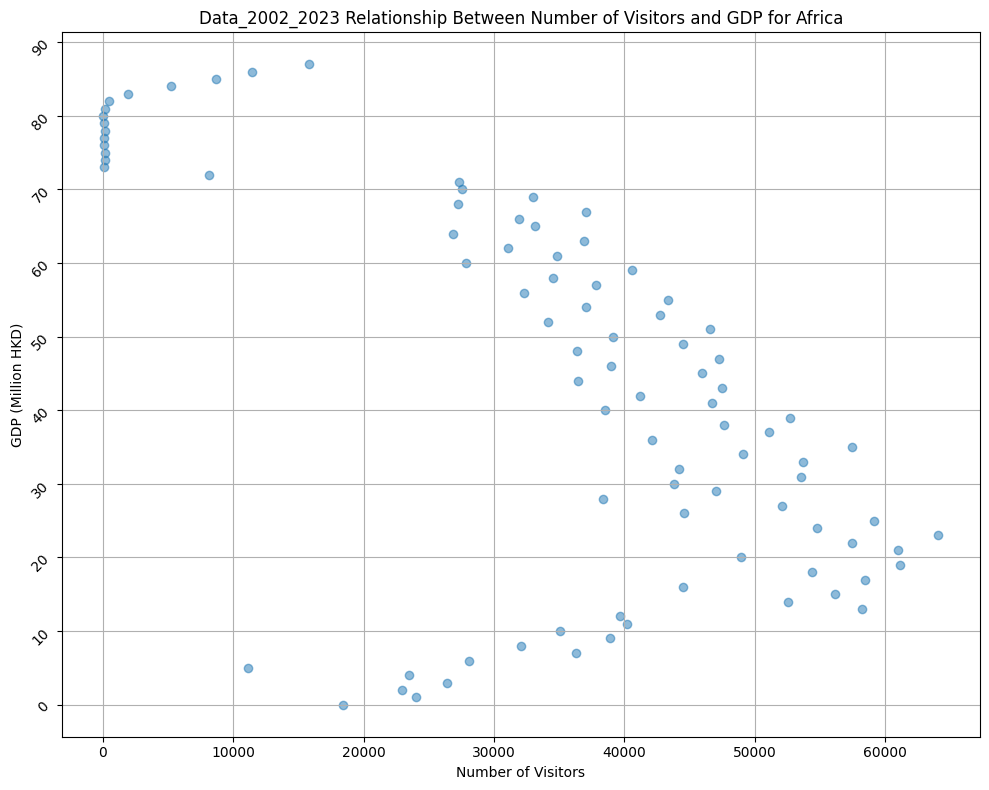

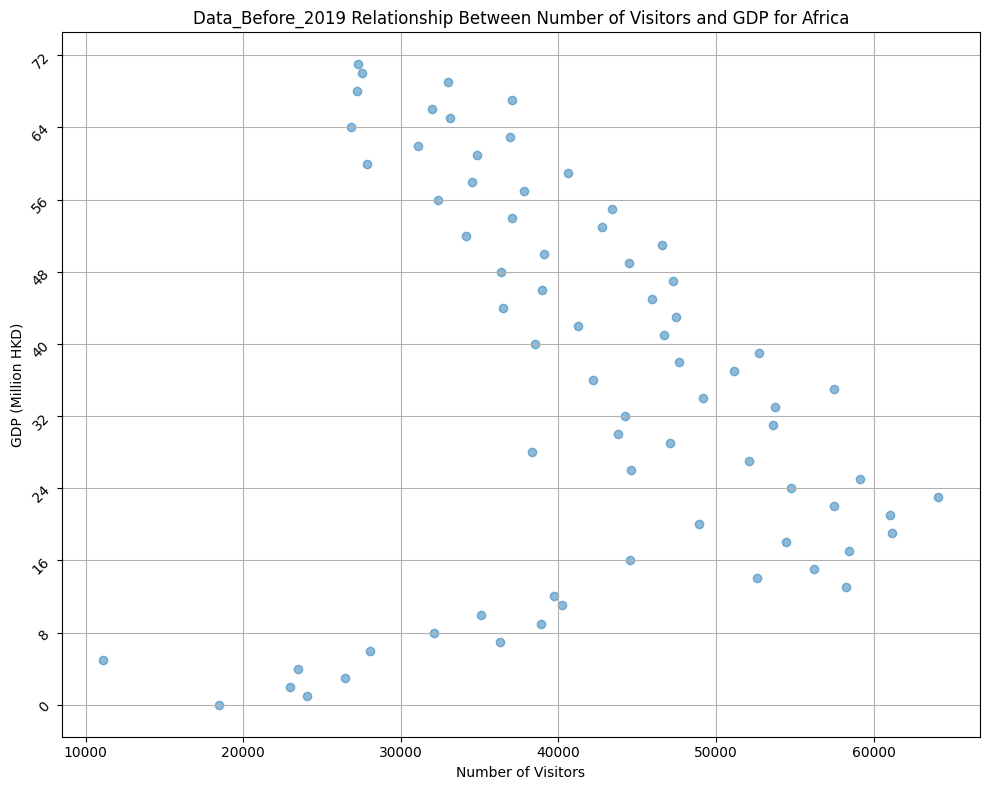

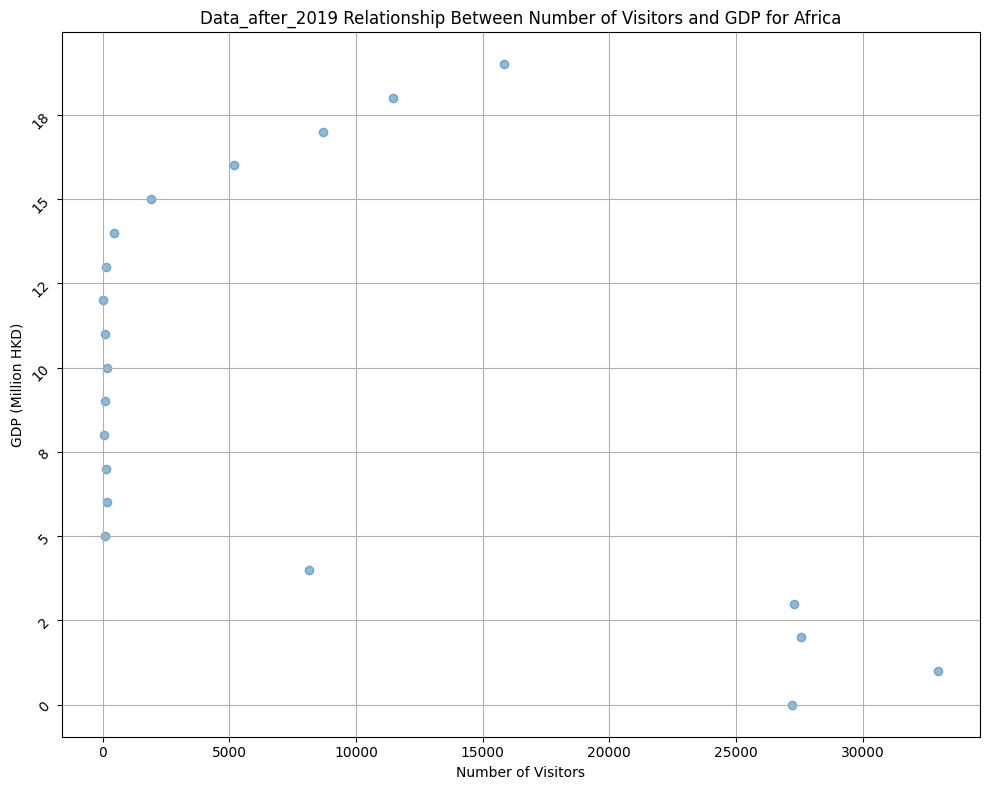

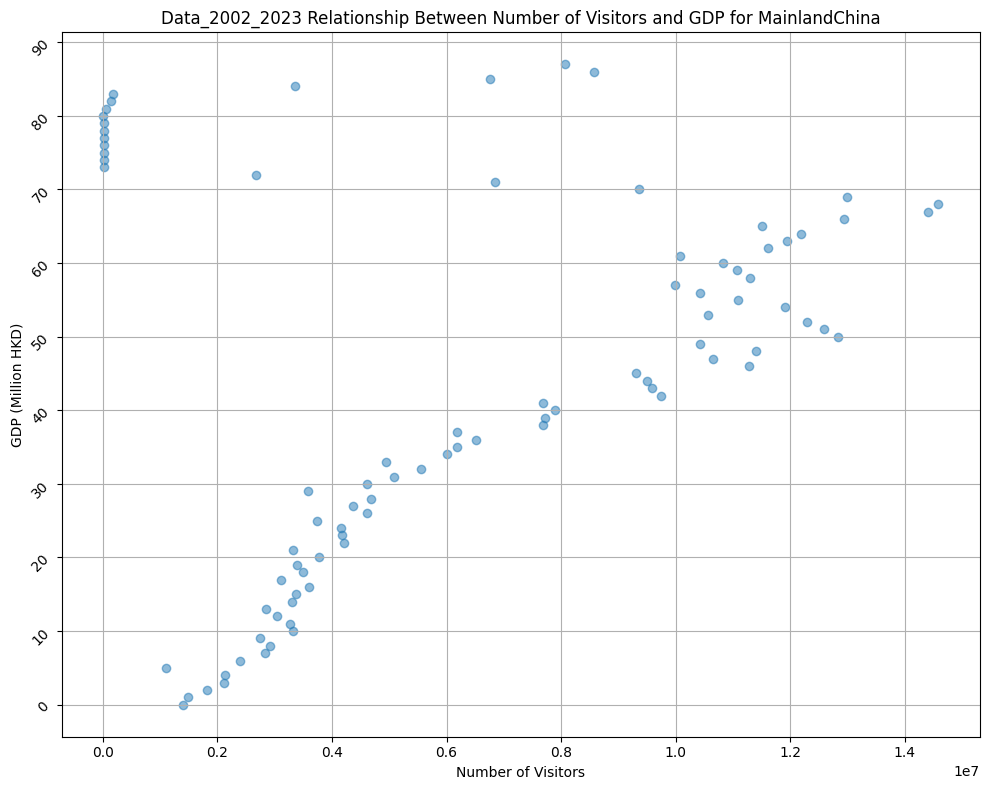

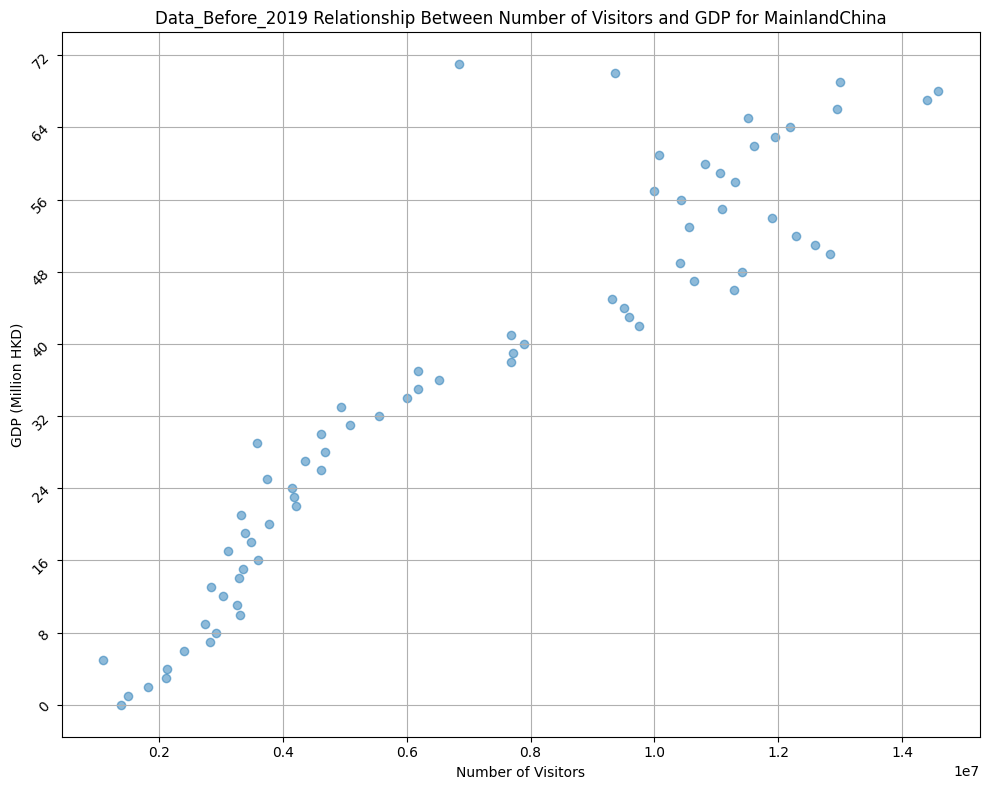

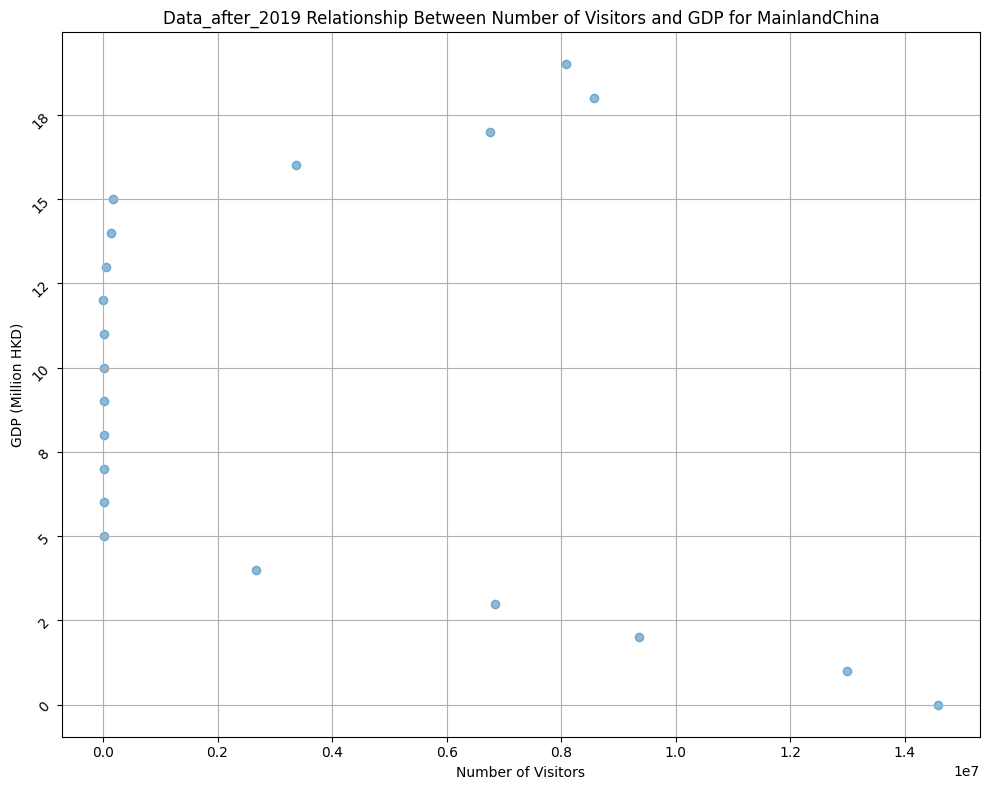

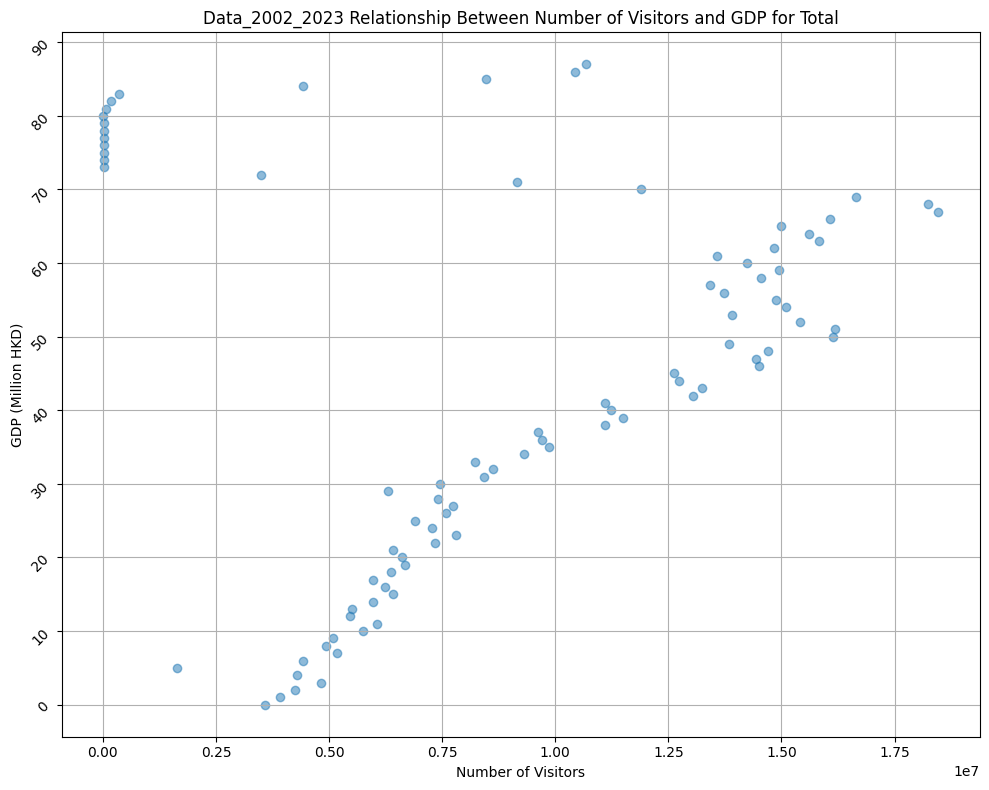

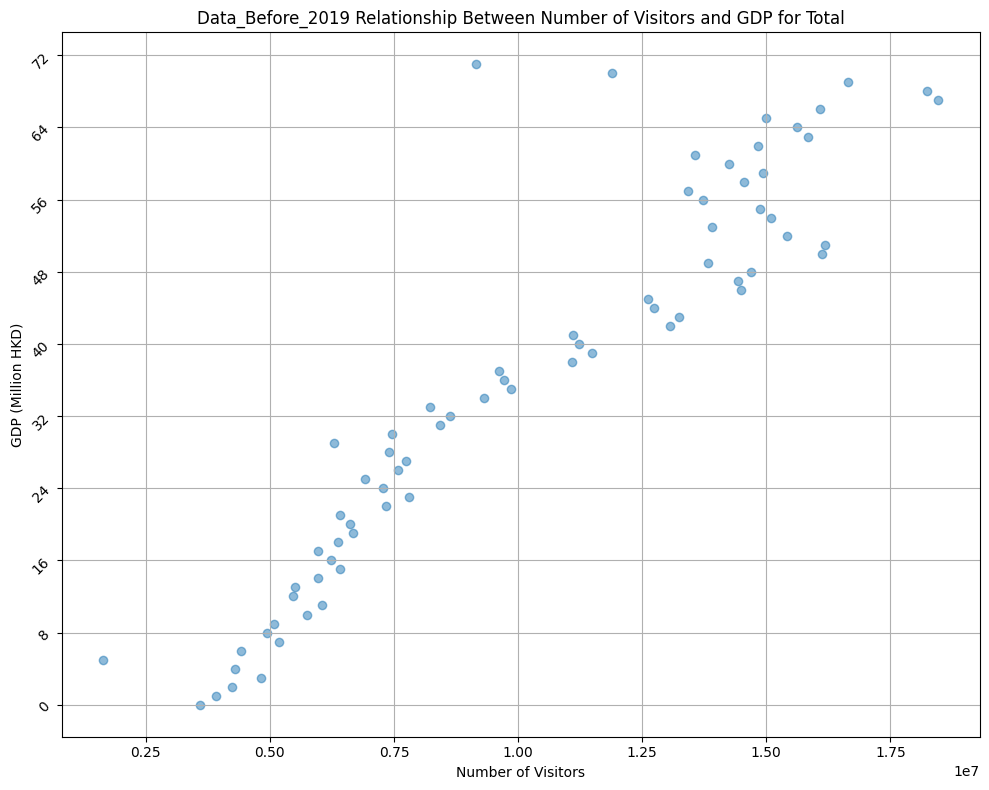

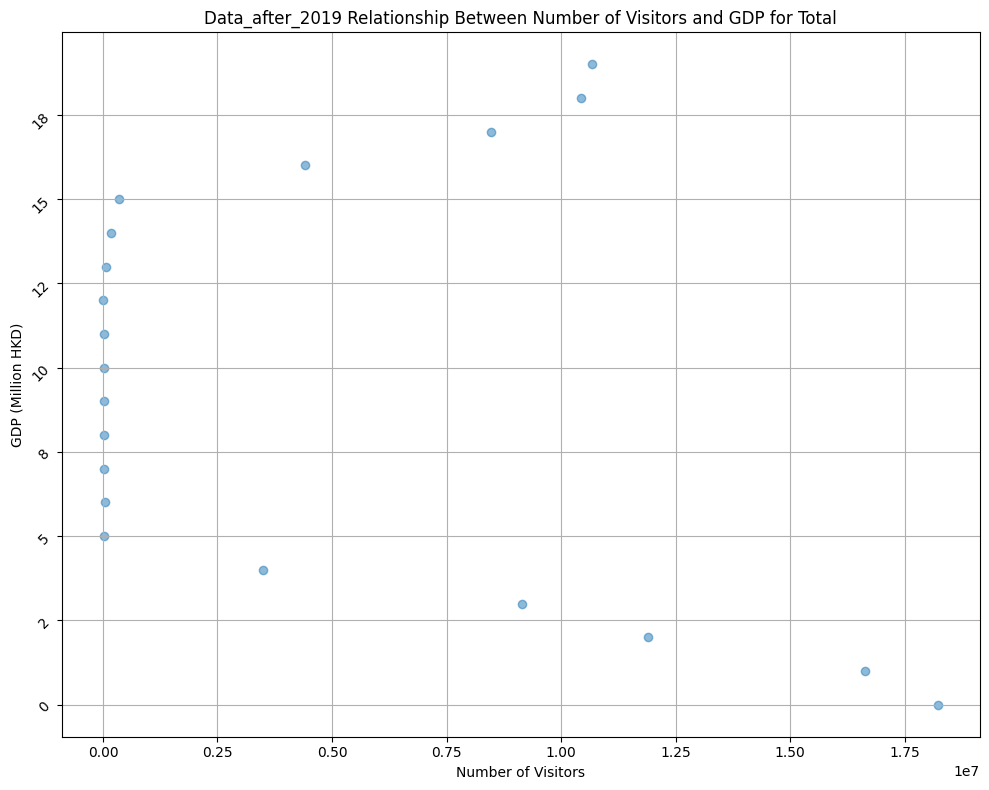

In [7]:
# Since there are too many country to explain , in jupyter notebook we only aim some country and totoal visitors and GDP Data here
# Array for all country
country_columns = ['Africa', 'MainlandChina','Total']
# Create a result_dict for store the model result
all_data_flag = "Data_2002_2023"
data_before_2019_flag = "Data_Before_2019"
data_after_2019_flag = "Data_after_2019"
#this will port the raw data between visitors and gdp scatter
for country in country_columns:
    plot_visitor_GDP_results_with_raw_data(merged_data, country, "Results", all_data_flag)
    plot_visitor_GDP_results_with_raw_data(data_before_2019, country, "Results", data_before_2019_flag)
    plot_visitor_GDP_results_with_raw_data(data_after_2019, country, "Results", data_after_2019_flag)


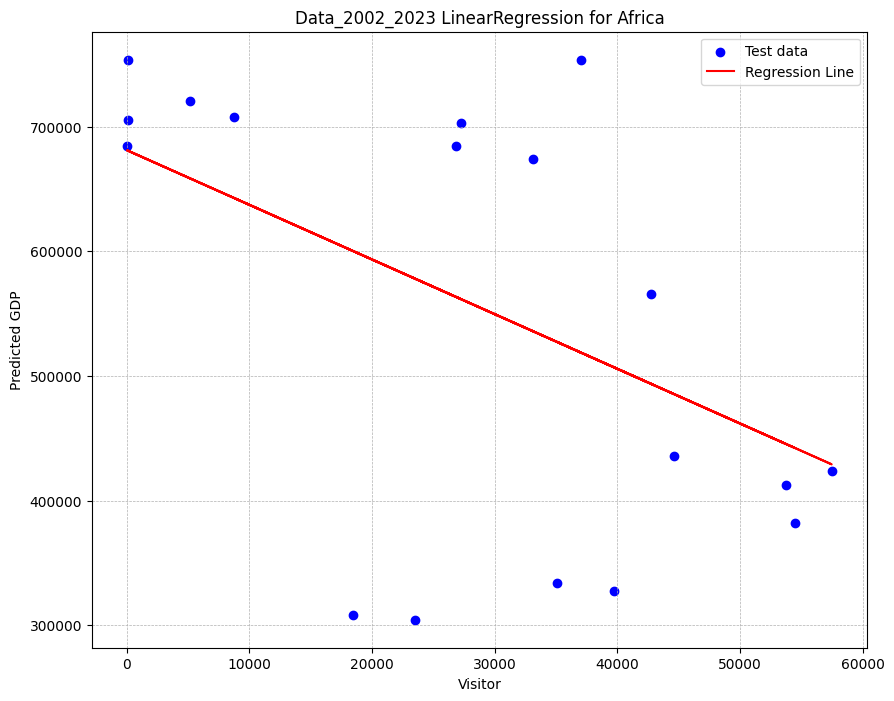

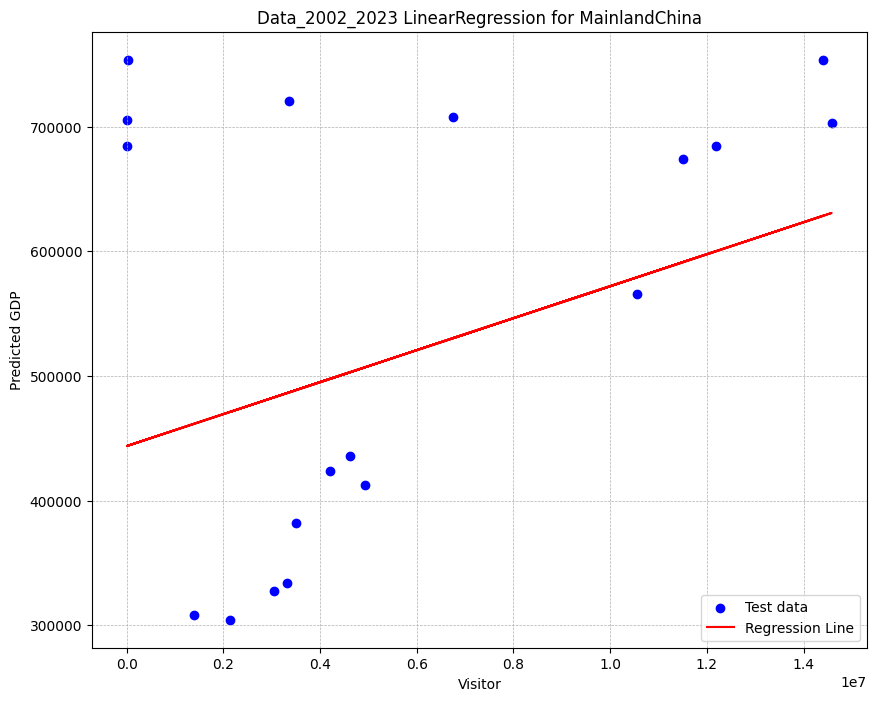

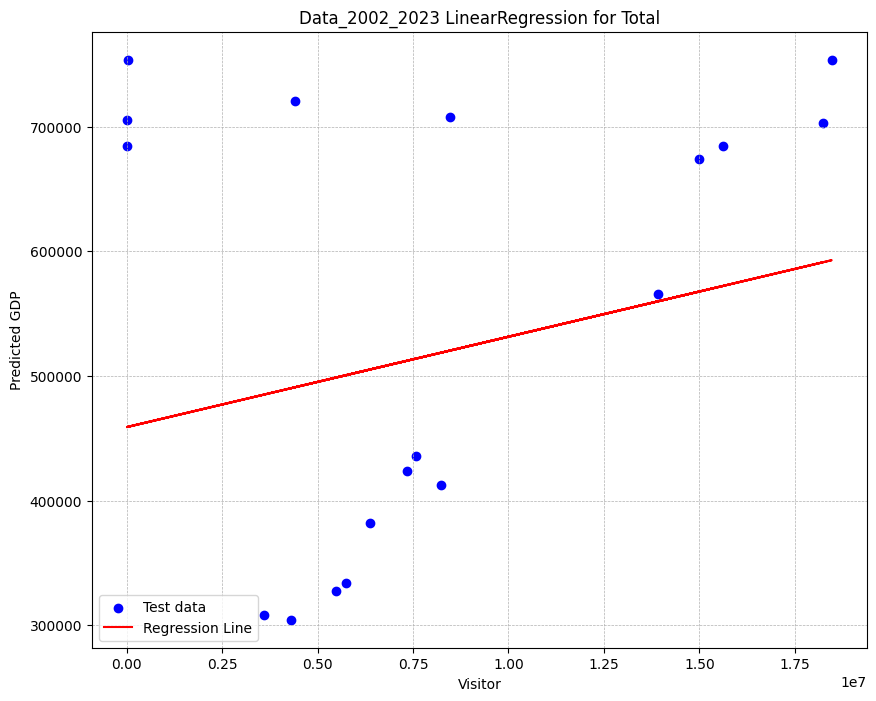

Analysis for Africa:
The Linear Regression model's R^2 score is 0.31. This means that 30.7% of the variance in GDP is explained by the number of visitors from Africa.
The Linear Regression model's Pearson correlation coefficient is 0.56 for Africa
The Polynomial Regression model's R^2 score is 0.31. This means that 30.6% of the variance in GDP is explained by the number of visitors from Africa.
The Random Forest model's R^2 score is 0.32. This means that 32.5% of the variance in GDP is explained by the number of visitors from Africa, indicating a higher level of accuracy in prediction compared to the Linear Regression model.

Analysis for MainlandChina:
The Linear Regression model's R^2 score is 0.10. This means that 10.4% of the variance in GDP is explained by the number of visitors from MainlandChina.
The Linear Regression model's Pearson correlation coefficient is 0.38 for MainlandChina
The Polynomial Regression model's R^2 score is 0.31. This means that 31.4% of the variance in GDP

In [9]:
# After get these raw data scatter plot , we will create train test to fit into the model
All_Data_results_dict = {}
for country in country_columns:
    X = merged_data[[country]].values.flatten()
    y = merged_data['GDP_Million_HKD'].values
    # Ensure X & y is numeric and handle any non-numeric entries
    X = pd.to_numeric(X, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')  # This will convert non-numeric values to NaN
    mask = ~np.isnan(X) & ~np.isnan(y)  # This will remove NaN values that were non-numeric
    X = X[mask]
    y = y[mask]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Fit the models
    # LinearRegression
    model_lr = LinearRegression()
    model_lr.fit(X_train.reshape(-1, 1), y_train)
    y_pred_lr = model_lr.predict(X_test.reshape(-1, 1))
    r2_lr = r2_score(y_test, y_pred_lr)
    # Pearson correlation coefficient for Linear Regression
    corr_coef_lr, _ = pearsonr(y_test, y_pred_lr)
    plot_linear_results(X_test, y_test, y_pred_lr, f"{all_data_flag} LinearRegression for {country}", "Linear")
    
    # Polynomial Regression
    degree = 2
    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_poly.fit(X_train.reshape(-1, 1), y_train)
    y_pred_poly = model_poly.predict(X_test.reshape(-1, 1))
    r2_poly = r2_score(y_test, y_pred_poly)
    plot_poly_results(X_test, y_test, model_poly, degree,
    f"{all_data_flag} Polynomial Regression of {country} - degree = {degree}", "Poly")

    # RandomForest Regressor
    t = 30
    model_rf = RandomForestRegressor(n_estimators=t, max_depth=2)
    model_rf.fit(X_train.reshape(-1, 1), y_train)
    y_pred_rf = model_rf.predict(X_test.reshape(-1, 1))
    r2_rf = r2_score(y_test, y_pred_rf)
    # # plot tree dot
    # estimator = model_rf.estimators_[0]
    # dot_filename = f"{flag}_{country}_tree.dot"
    # graph_filename = f"{flag}_{country}_Source.gv"
    # savePath = "RandomForest"
    # export_graphviz(estimator, out_file=os.path.join(savePath, dot_filename),
    #                 feature_names=['number_of_visitors'],
    #                 class_names=['output'],
    #                 rounded=True, proportion=True,
    #                 precision=2, filled=True)
    # with open(os.path.join(savePath, dot_filename)) as f:
    #     dot_graph = f.read()
    # graph = graphviz.Source(dot_graph)
    # graph.render(filename=os.path.join(savePath, graph_filename), format='pdf', view=True)
    All_Data_results_dict[country] = {
        'Linear Regression': {'r2_score': r2_lr, 'pearson_r': corr_coef_lr},
        'Random Forest': {'r2_score': r2_rf},
        # 'KMeans': {'clusters': clusters},
        'Polynomial Regression': {'r2_score': r2_poly},
    }
print_result(All_Data_results_dict)

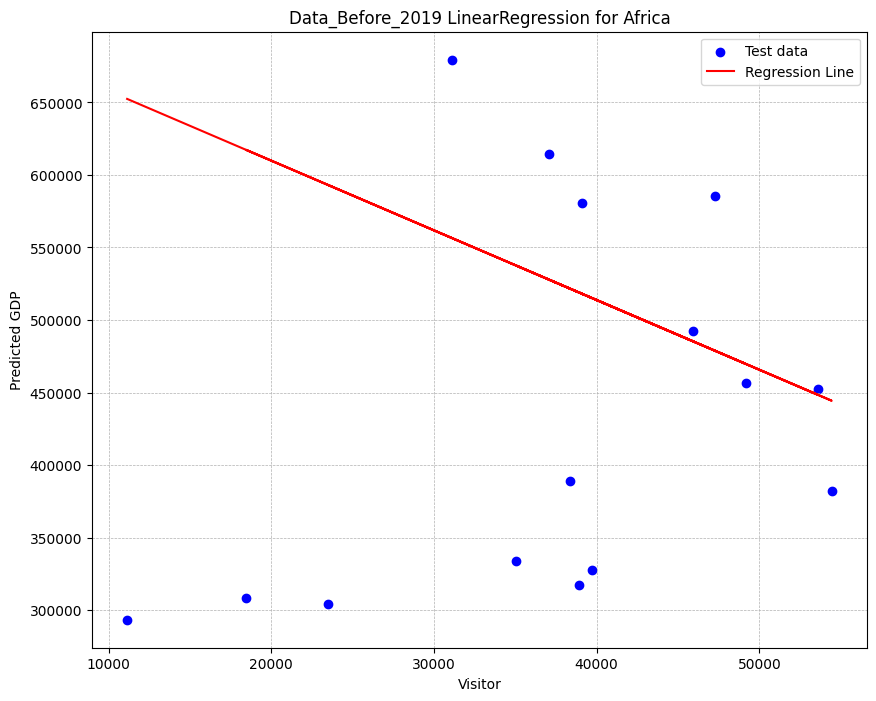

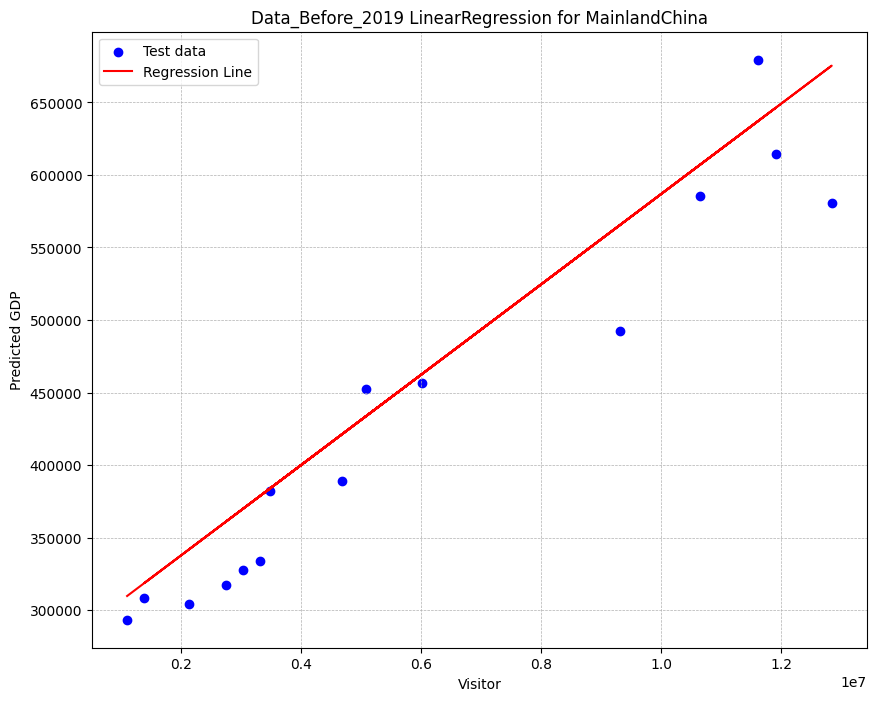

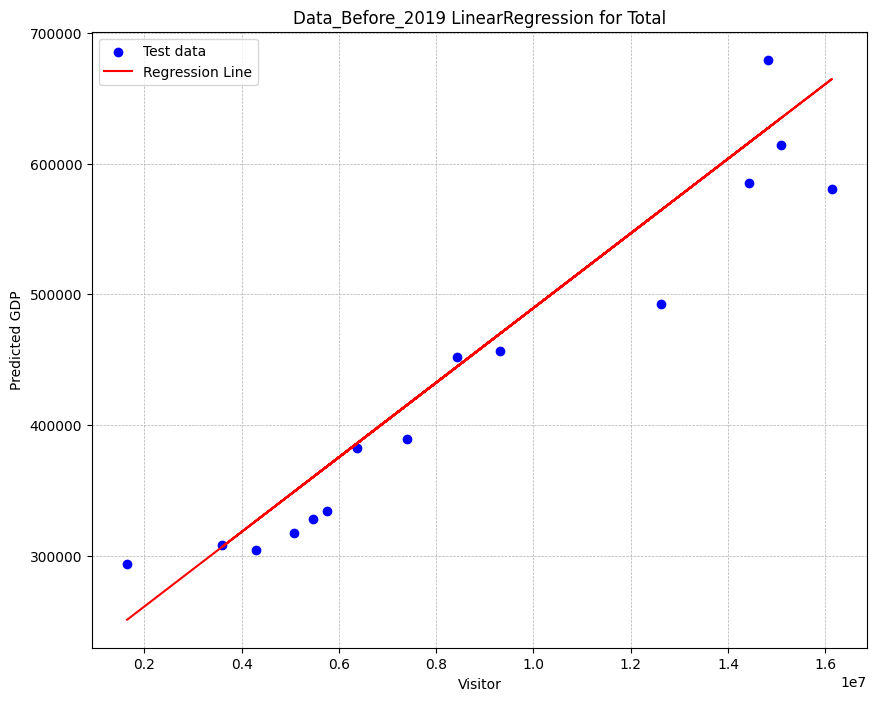

Analysis for Africa:
The Linear Regression model's R^2 score is -1.08. This means that -107.6% of the variance in GDP is explained by the number of visitors from Africa.
The Linear Regression model's Pearson correlation coefficient is -0.35 for Africa
The Polynomial Regression model's R^2 score is -0.39. This means that -38.7% of the variance in GDP is explained by the number of visitors from Africa.
The Random Forest model's R^2 score is 0.01. This means that 1.5% of the variance in GDP is explained by the number of visitors from Africa, indicating a higher level of accuracy in prediction compared to the Linear Regression model.

Analysis for MainlandChina:
The Linear Regression model's R^2 score is 0.89. This means that 88.7% of the variance in GDP is explained by the number of visitors from MainlandChina.
The Linear Regression model's Pearson correlation coefficient is 0.97 for MainlandChina
The Polynomial Regression model's R^2 score is 0.89. This means that 89.4% of the variance i

In [10]:
# After get these raw data scatter plot , we will create train test to fit into the model
Data_before_2019_results_dict = {}
for country in country_columns:
    X = data_before_2019[[country]].values.flatten()
    y = data_before_2019['GDP_Million_HKD'].values
    # Ensure X & y is numeric and handle any non-numeric entries
    X = pd.to_numeric(X, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')  # This will convert non-numeric values to NaN
    mask = ~np.isnan(X) & ~np.isnan(y)  # This will remove NaN values that were non-numeric
    X = X[mask]
    y = y[mask]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Fit the models
    # LinearRegression
    model_lr = LinearRegression()
    model_lr.fit(X_train.reshape(-1, 1), y_train)
    y_pred_lr = model_lr.predict(X_test.reshape(-1, 1))
    r2_lr = r2_score(y_test, y_pred_lr)
    # Pearson correlation coefficient for Linear Regression
    corr_coef_lr, _ = pearsonr(y_test, y_pred_lr)
    plot_linear_results(X_test, y_test, y_pred_lr, f"{data_before_2019_flag} LinearRegression for {country}", "Linear")
    
    # Polynomial Regression
    degree = 2
    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_poly.fit(X_train.reshape(-1, 1), y_train)
    y_pred_poly = model_poly.predict(X_test.reshape(-1, 1))
    r2_poly = r2_score(y_test, y_pred_poly)
    plot_poly_results(X_test, y_test, model_poly, degree,
    f"{data_before_2019_flag} Polynomial Regression of {country} - degree = {degree}", "Poly")

    # RandomForest Regressor
    t = 30
    model_rf = RandomForestRegressor(n_estimators=t, max_depth=2)
    model_rf.fit(X_train.reshape(-1, 1), y_train)
    y_pred_rf = model_rf.predict(X_test.reshape(-1, 1))
    r2_rf = r2_score(y_test, y_pred_rf)
    # # plot tree dot
    # estimator = model_rf.estimators_[0]
    # dot_filename = f"{flag}_{country}_tree.dot"
    # graph_filename = f"{flag}_{country}_Source.gv"
    # savePath = "RandomForest"
    # export_graphviz(estimator, out_file=os.path.join(savePath, dot_filename),
    #                 feature_names=['number_of_visitors'],
    #                 class_names=['output'],
    #                 rounded=True, proportion=True,
    #                 precision=2, filled=True)
    # with open(os.path.join(savePath, dot_filename)) as f:
    #     dot_graph = f.read()
    # graph = graphviz.Source(dot_graph)
    # graph.render(filename=os.path.join(savePath, graph_filename), format='pdf', view=True)
    Data_before_2019_results_dict[country] = {
        'Linear Regression': {'r2_score': r2_lr, 'pearson_r': corr_coef_lr},
        'Random Forest': {'r2_score': r2_rf},
        # 'KMeans': {'clusters': clusters},
        'Polynomial Regression': {'r2_score': r2_poly},
    }
print_result(Data_before_2019_results_dict)

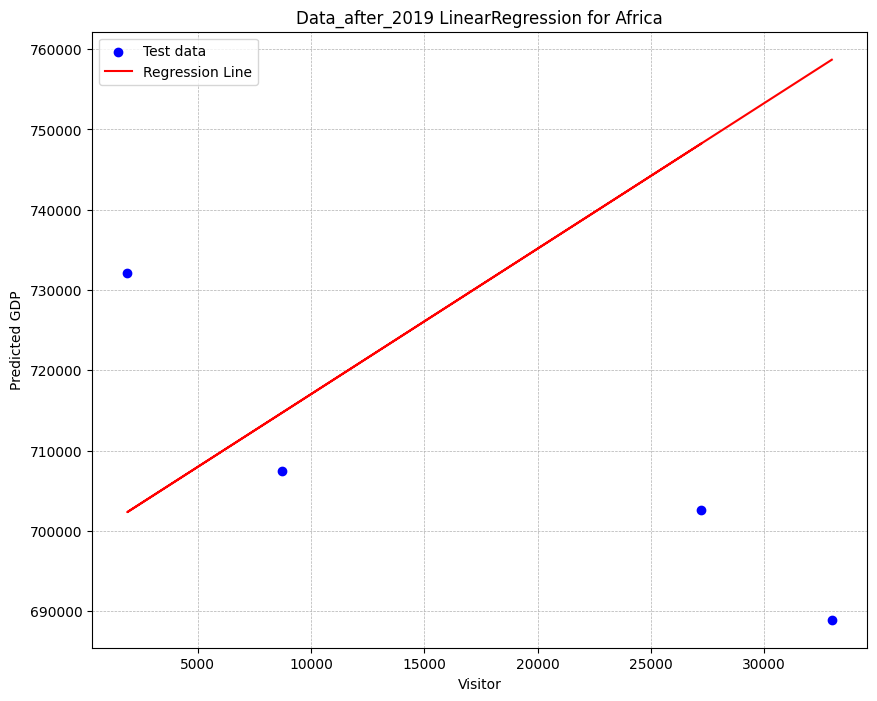

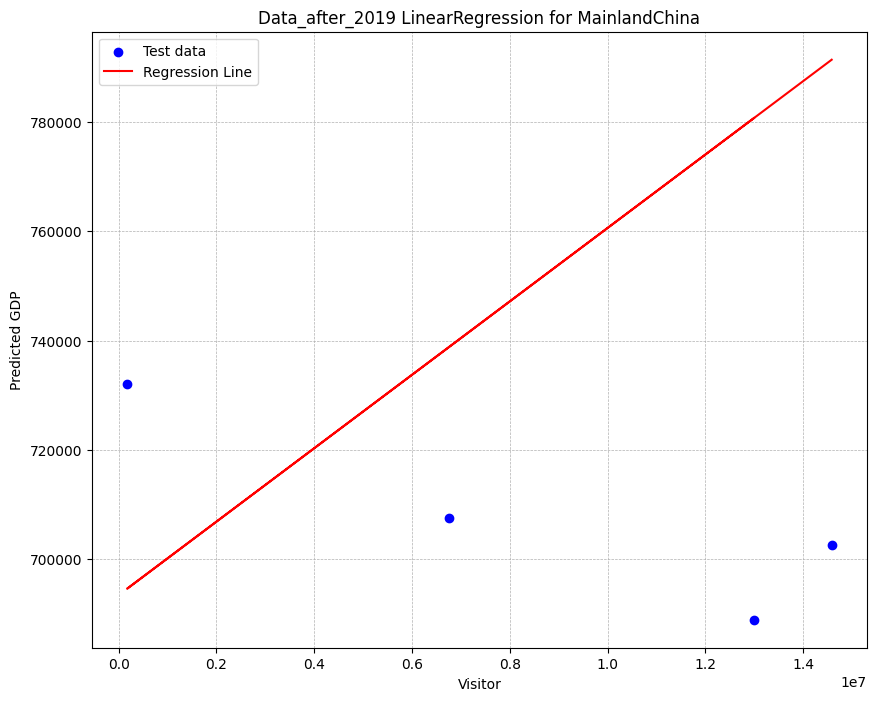

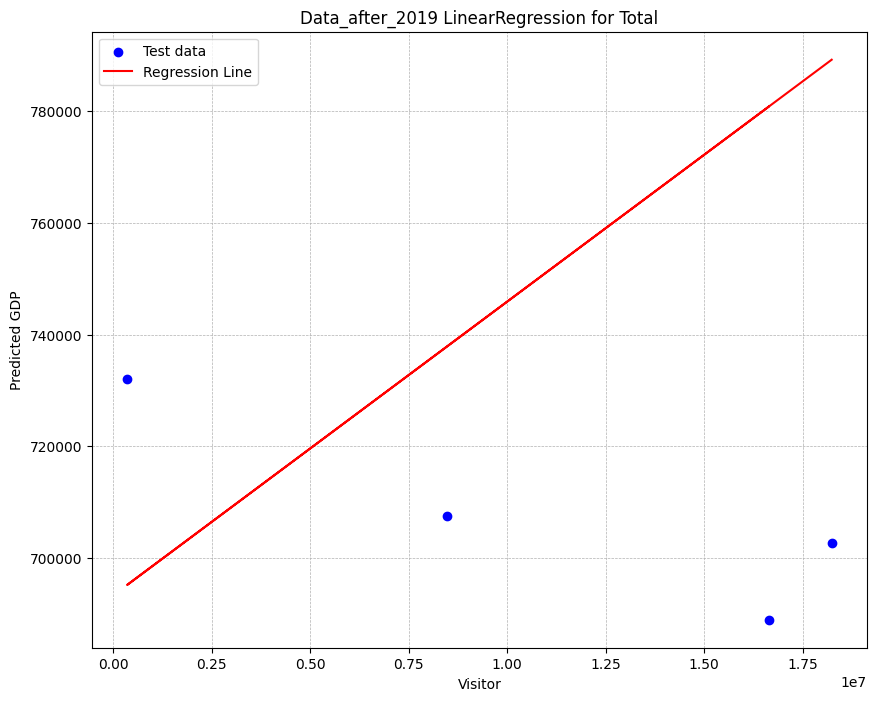

Analysis for Africa:
The Linear Regression model's R^2 score is -7.12. This means that -711.5% of the variance in GDP is explained by the number of visitors from Africa.
The Linear Regression model's Pearson correlation coefficient is -0.90 for Africa
The Polynomial Regression model's R^2 score is -1.88. This means that -187.6% of the variance in GDP is explained by the number of visitors from Africa.
The Random Forest model's R^2 score is -3.15. This means that -315.5% of the variance in GDP is explained by the number of visitors from Africa, indicating a higher level of accuracy in prediction compared to the Linear Regression model.

Analysis for MainlandChina:
The Linear Regression model's R^2 score is -18.22. This means that -1822.1% of the variance in GDP is explained by the number of visitors from MainlandChina.
The Linear Regression model's Pearson correlation coefficient is -0.90 for MainlandChina
The Polynomial Regression model's R^2 score is -33.90. This means that -3389.6% o

In [11]:
# After get these raw data scatter plot , we will create train test to fit into the model
Data_after_2019_results_dict = {}
for country in country_columns:
    X = data_after_2019[[country]].values.flatten()
    y = data_after_2019['GDP_Million_HKD'].values
    # Ensure X & y is numeric and handle any non-numeric entries
    X = pd.to_numeric(X, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')  # This will convert non-numeric values to NaN
    mask = ~np.isnan(X) & ~np.isnan(y)  # This will remove NaN values that were non-numeric
    X = X[mask]
    y = y[mask]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Fit the models
    # LinearRegression
    model_lr = LinearRegression()
    model_lr.fit(X_train.reshape(-1, 1), y_train)
    y_pred_lr = model_lr.predict(X_test.reshape(-1, 1))
    r2_lr = r2_score(y_test, y_pred_lr)
    # Pearson correlation coefficient for Linear Regression
    corr_coef_lr, _ = pearsonr(y_test, y_pred_lr)
    plot_linear_results(X_test, y_test, y_pred_lr, f"{data_after_2019_flag} LinearRegression for {country}", "Linear")
    
    # Polynomial Regression
    degree = 2
    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_poly.fit(X_train.reshape(-1, 1), y_train)
    y_pred_poly = model_poly.predict(X_test.reshape(-1, 1))
    r2_poly = r2_score(y_test, y_pred_poly)
    plot_poly_results(X_test, y_test, model_poly, degree,
    f"{data_after_2019_flag} Polynomial Regression of {country} - degree = {degree}", "Poly")

    # RandomForest Regressor
    t = 30
    model_rf = RandomForestRegressor(n_estimators=t, max_depth=2)
    model_rf.fit(X_train.reshape(-1, 1), y_train)
    y_pred_rf = model_rf.predict(X_test.reshape(-1, 1))
    r2_rf = r2_score(y_test, y_pred_rf)
    # # plot tree dot
    # estimator = model_rf.estimators_[0]
    # dot_filename = f"{flag}_{country}_tree.dot"
    # graph_filename = f"{flag}_{country}_Source.gv"
    # savePath = "RandomForest"
    # export_graphviz(estimator, out_file=os.path.join(savePath, dot_filename),
    #                 feature_names=['number_of_visitors'],
    #                 class_names=['output'],
    #                 rounded=True, proportion=True,
    #                 precision=2, filled=True)
    # with open(os.path.join(savePath, dot_filename)) as f:
    #     dot_graph = f.read()
    # graph = graphviz.Source(dot_graph)
    # graph.render(filename=os.path.join(savePath, graph_filename), format='pdf', view=True)
    Data_after_2019_results_dict[country] = {
        'Linear Regression': {'r2_score': r2_lr, 'pearson_r': corr_coef_lr},
        'Random Forest': {'r2_score': r2_rf},
        # 'KMeans': {'clusters': clusters},
        'Polynomial Regression': {'r2_score': r2_poly},
    }
print_result(Data_after_2019_results_dict)